In [1]:
include("install_pkg.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %Fetching: [=====>                                   ]  11.0 %Fetching: [=====>                                   ]  12.2 %Fetching: [======>                                  ]  12.7 %Fetching: [=======>                                 ]  15.3 %Fetching: [=======>                                 ]  16.4 %Fetching: [========>                                ]  19.2 %Fetching: [=============>                           ]  32.2 %Fetching: [================>                        ]  38.8 %Fetching: [====================>                    ]  49.4 %Fetching: [=========================>               ]  60.4 %Fetching: [==========================>              ]  63.7 %Fetching: [==========================>              ]  64.7 %Fetching: [===========================>             ]  66.1 %Fetching: [========

In [1]:
include("src/main.jl")

using ProgressBars
using HDF5, JLD
using DelimitedFiles
using Dates
using ProfileView
using Profile


Id = SparseArrays.I

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/ayedm/.julia/packages/PyPlot/4wzW1/src/init.jl:192


LinearAlgebra.UniformScaling{Bool}
true*I

In [38]:
results_folder = "results/data_for_kn_small/fixed sigma"

results_folder = "results/data_sbm_600/fixed sigma"

#results_folder = "results/sbm_1200/fixed sigma"
#results_folder = "results/amazon_10000/free sigma"

chains_names = first(walkdir(results_folder))[2][4:5]

2-element Array{String,1}:
 "07-06-20_21-01-39"
 "07-06-20_21-02-47"

In [39]:
# Load variables of each chain

n_active_list = Dict()
kappa_list = Dict()
sigma_list = Dict()
tau_list = Dict()
alpha_list = Dict()
beta_list = Dict()

M = length(chains_names)
for m in 1:M
  load_dir = string(results_folder,"/",chains_names[m],"/variables/")
  variables = load(string(load_dir,"variables.jld"))
  n_active_list[m] = variables["n_active_list"]
  kappa_list[m] = variables["kappa_list"]
  sigma_list[m] = variables["sigma_list"]
  tau_list[m] = variables["tau_list"]
  alpha_list[m] = variables["alpha_list"]
  beta_list[m] = variables["beta_list"]
end

In [40]:
load_dir = string(results_folder,"/",chains_names[1],"/variables/")
variables = load(string(load_dir,"variables.jld"))

Dict{String,Any} with 15 entries:
  "skip"             => 50
  "n_iter"           => 10000
  "ind_clusterings"  => [5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, …
  "prop_params"      => Dict{Any,Any}("sigma"=>0.04,"alpha"=>0.04,"kappa"=>0.04…
  "tau_list"         => [3.67406, 4.03437, 3.21094, 2.22306, 1.5777, 0.975346, …
  "alpha_list"       => [0.999927, 0.996723, 0.995576, 0.999897, 0.993699, 0.99…
  "partition_"       => Dict(1=>…
  "sentAndReceived_" => Dict(30=>[0, 0, 0, 0, 1, 1, 0, 0, 0, 0  …  1, 0, 0, 0, …
  "beta_list"        => [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5  …  0…
  "sigma_list"       => [-0.0379459, 0.0182768, -0.0421784, -0.220907, -0.13162…
  "clusterings"      => [2 1 … 3 6; 2 1 … 3 1; … ; 1 2 … 2 2; 4 2 … 4 1]
  "prior_params"     => Dict{Any,Any}("sigma"=>(0.1, 0.1),"alpha"=>(0.1, 1.0),"…
  "kappa_list"       => [0.263003, 0.122679, 0.119641, 0.319432, 0.641343, 0.33…
  "activities_list"  => [6.71636 0.000532243 … 0.0 0.0; 6.20332 0.0041440

In [41]:
# Make sure that all chains have same number of iterations
T = length(n_active_list[1])
print(string("All chains have ", T, " iterations = ",
            all([T == length(chain) for chain in values(n_active_list)])))

All chains have 10000 iterations = true

In [42]:
# Concatenate values after burn
burn = Int(T/2)

kn_array = vcat([chain[burn:T] for chain in values(n_active_list)]...);
sigma_array = vcat([chain[burn:T] for chain in values(sigma_list)]...);
alpha_array = vcat([chain[burn:T] for chain in values(alpha_list)]...);
tau_array = vcat([chain[burn:T] for chain in values(tau_list)]...);

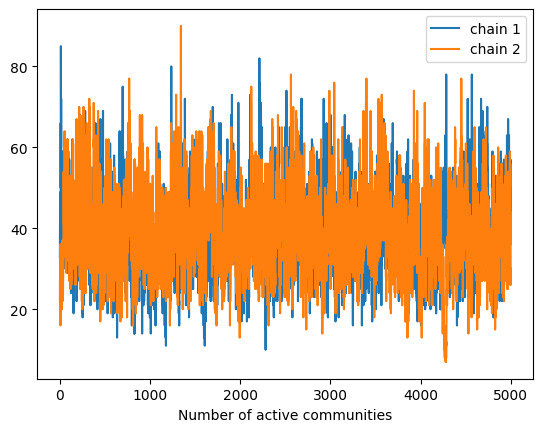

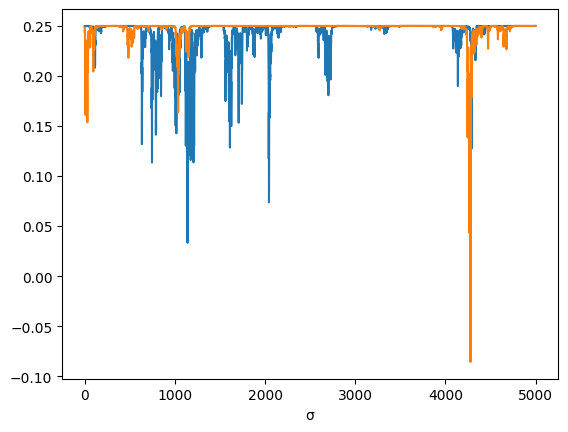

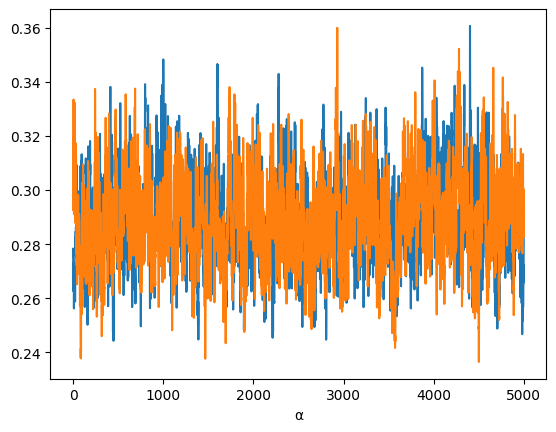

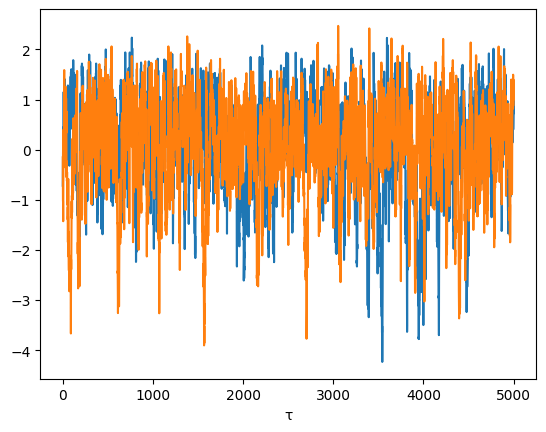

PyObject Text(0.5, 24.0, 'τ')

In [43]:
PyPlot.figure(figsize=(6.40,4.80))


for (m, chain) in enumerate(values(n_active_list))
    PyPlot.plot(chain[burn:T], label="chain $m")
end
PyPlot.legend()
PyPlot.xlabel("Number of active communities")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(sigma_list)
    PyPlot.plot(chain[burn:T])
end
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(alpha_list)
    PyPlot.plot(chain[burn:T])
end
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(tau_list)
    PyPlot.plot(log.(chain[burn:T]))
end
PyPlot.xlabel("τ")

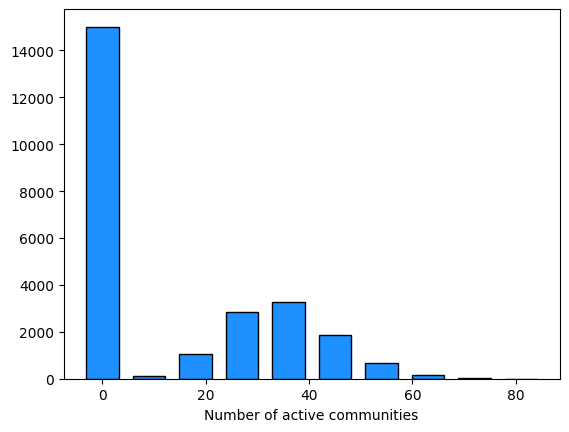

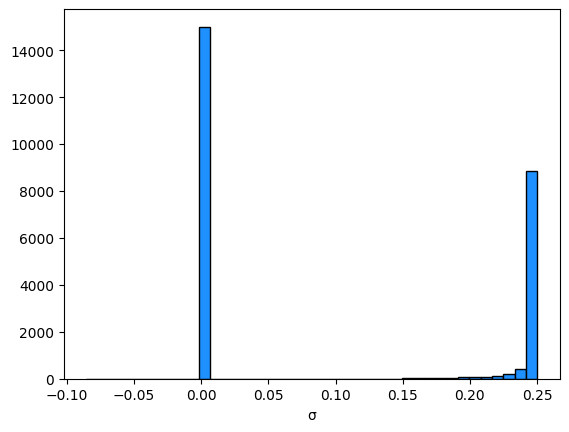

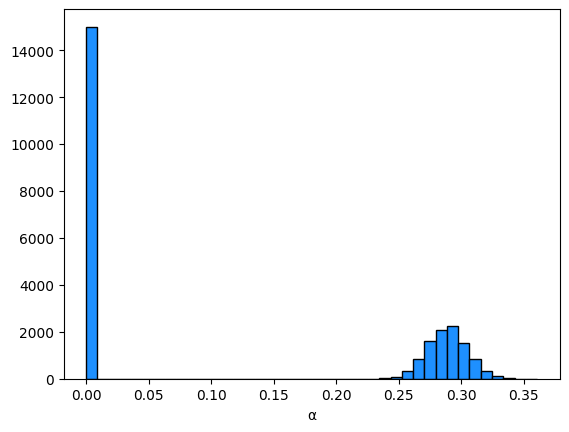

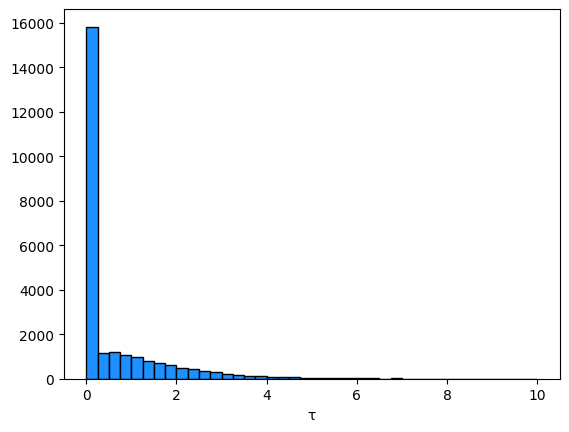

PyObject Text(0.5, 24.0, 'τ')

In [19]:
# Plot histograms
# Amazon

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            #range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            #range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            #range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(tau_array,
            range=(0.,10.),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("τ")

Mean and variance of the posterior Kn = (38.61297740451909, 108.23166038725061)


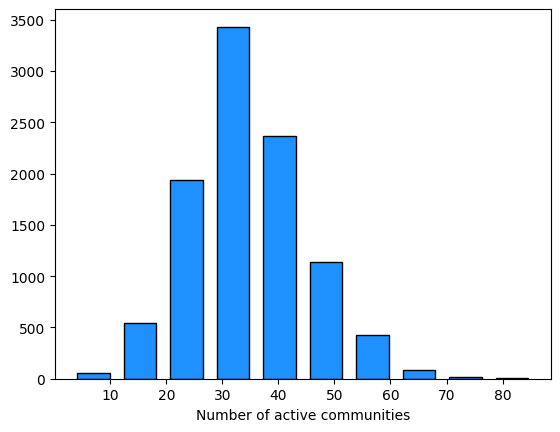

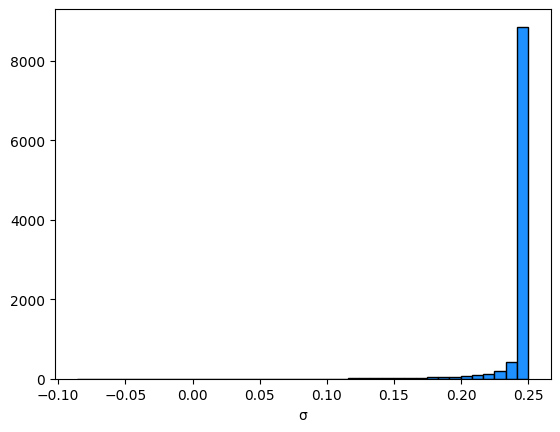

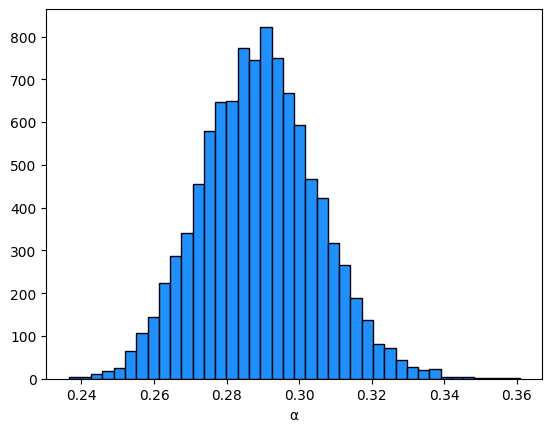

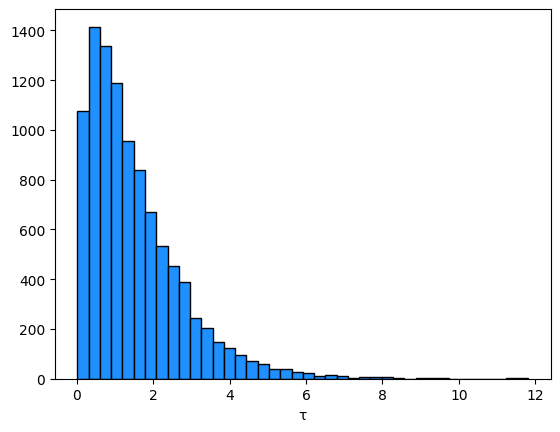

95% credible region of the posterior Kn = (20.0, 61.0)


In [44]:
# Plot histograms
# Small

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            #range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            #range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            #range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(tau_array,
            #range=(0.,10.),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("τ")

println(string("Mean and variance of the posterior Kn = (",
            mean(kn_array), ", ",
            var(kn_array), ")") )

println(string("95% credible region of the posterior Kn = (",
            quantile(kn_array, 0.025), ", ",
            quantile(kn_array, 0.975), ")") )

In [47]:
# Analyse clusterings
# Load variables of each chain

clusterings_list = Dict()

M = length(chains_names)
for m in 1:M
  load_dir = string(results_folder,"/",chains_names[m],"/variables/")
  variables = load(string(load_dir,"variables.jld"))
  clusterings_list[m] = variables["clusterings"]
end

In [108]:
using StatsBase
clusterings = hcat(clusterings_list[1], clusterings_list[2])
cl_sizes = [length(unique(clusterings[:,c])) for c in range(1,20)]
small_val_list = []
large_val_list = []
prop_list = []

for c in range(1,20)
    unique_val = collect(values(countmap(clusterings[:,c])))
    small_val = unique_val[unique_val .< 170]
    large_val = unique_val[unique_val .>= 170]
    prop_list = vcat(prop_list, [sum(small_val)/600])
    small_val_list = vcat(small_val_list, small_val)
    large_val_list = vcat(large_val_list, large_val)
end

┌ Warning: `range(start, stop)` (with neither `length` nor `step` given) is deprecated, use `range(start, stop=stop)` instead.
│   caller = top-level scope at In[108]:3
└ @ Core In[108]:3
┌ Warning: `range(start, stop)` (with neither `length` nor `step` given) is deprecated, use `range(start, stop=stop)` instead.
│   caller = top-level scope at In[108]:7
└ @ Core ./In[108]:7


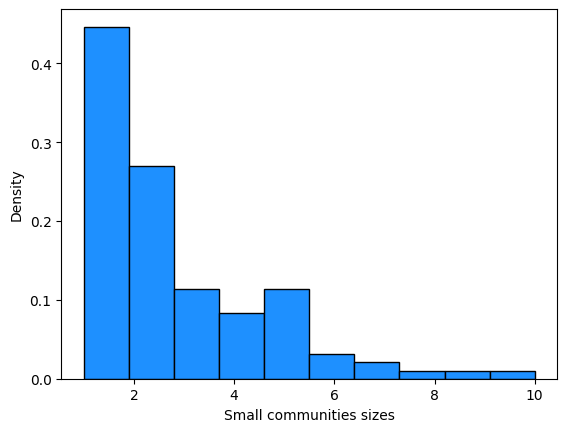

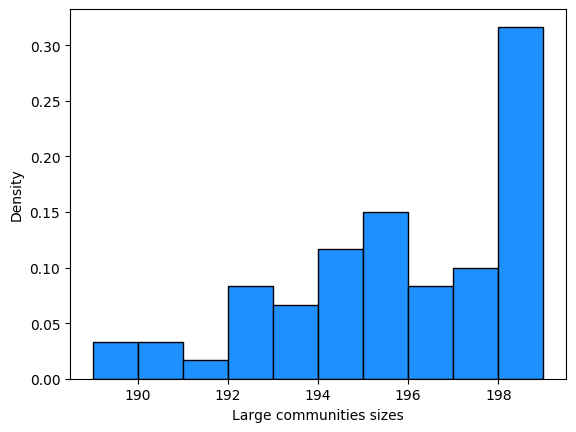

PyObject Text(24.000000000000007, 0.5, 'Density')

In [109]:
PyPlot.figure(figsize=(6.40,4.80))
PyPlot.hist(small_val_list,
            #range=(0.07,0.13),
            bins=10,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue",
            density=true)
            #rwidth=0.7);
PyPlot.xlabel("Small communities sizes")
PyPlot.ylabel("Density")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.hist(large_val_list,
            #range=(0.07,0.13),
            bins=10,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue",
            density=true)
            #rwidth=0.7);
PyPlot.xlabel("Large communities sizes")
PyPlot.ylabel("Density")

In [110]:
mean(large_val_list)

195.43333333333334

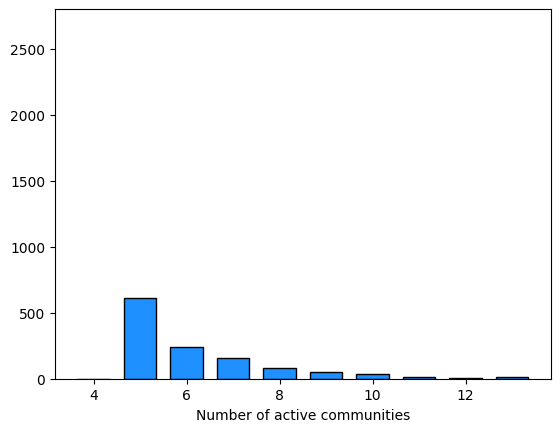

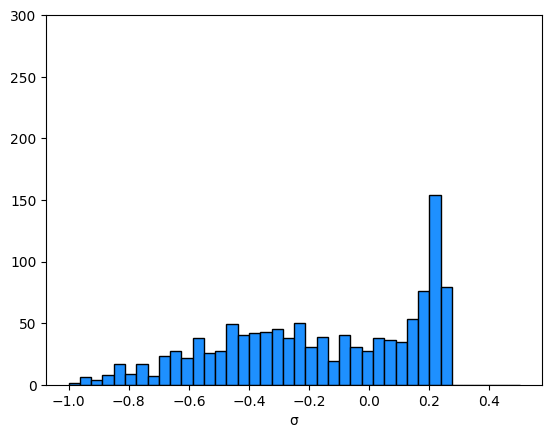

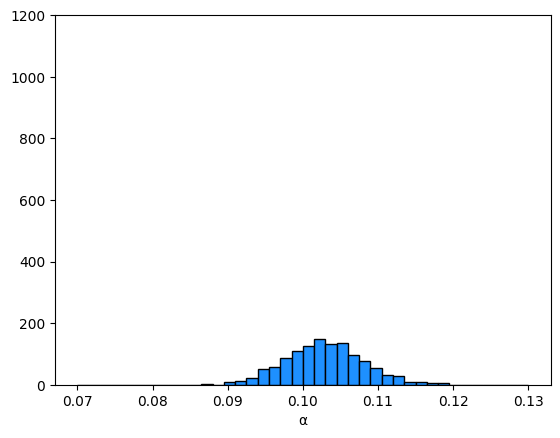

PyObject Text(0.5, 24.0, 'α')

In [81]:
# Plot histograms
# Medium

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

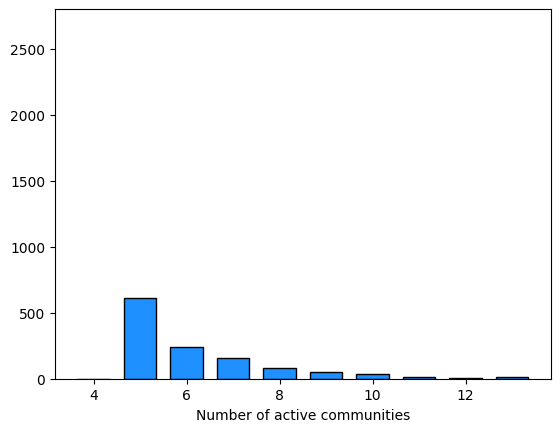

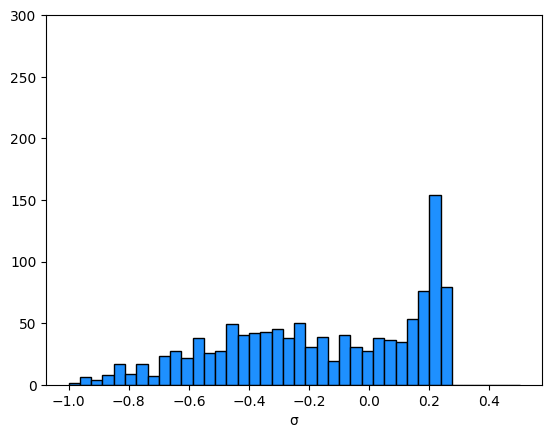

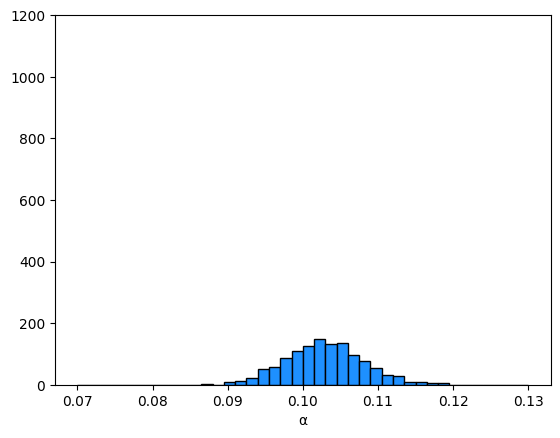

PyObject Text(0.5, 24.0, 'α')

In [82]:
# Plot histograms
# Large

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")